In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten , Dropout

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'shapes/',  # This is the source directory for training images
        classes = ['circles', 'squares','triangles'],
        target_size=(28, 28),  # All images will be resized to 28,28
        batch_size=10,
        # Use binary labels
        class_mode='categorical')

Found 300 images belonging to 3 classes.


In [43]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

model.add(Dropout(0.2))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(3, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',  # adam rmsprop
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/




In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 32)        1568      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dense_14 (Dense)             (None, 4, 4, 512)         16896     
_________________________________________________________________
dense_15 (Dense)             (None, 4, 4, 512)         262656    
_________________________________________________________________
dense_16 (Dense)             (None, 4, 4, 512)        

In [48]:
history = model.fit(train_generator,
steps_per_epoch=20,
epochs=20,
verbose=1,)

Epoch 1/20
20/20 [==============================] - 1s 29ms/step - loss: 0.1933 - accuracy: 0.9400
Epoch 2/20
20/20 [==============================] - 1s 28ms/step - loss: 0.1918 - accuracy: 0.9150
Epoch 3/20
20/20 [==============================] - 1s 27ms/step - loss: 0.2157 - accuracy: 0.9050
Epoch 4/20
20/20 [==============================] - 1s 27ms/step - loss: 0.1525 - accuracy: 0.9450
Epoch 5/20
20/20 [==============================] - 1s 28ms/step - loss: 0.1697 - accuracy: 0.9450
Epoch 6/20
20/20 [==============================] - 1s 27ms/step - loss: 0.1449 - accuracy: 0.9650
Epoch 7/20
20/20 [==============================] - 1s 28ms/step - loss: 0.2464 - accuracy: 0.9300
Epoch 8/20
20/20 [==============================] - 1s 28ms/step - loss: 0.1929 - accuracy: 0.9450
Epoch 9/20
20/20 [==============================] - 1s 28ms/step - loss: 0.0718 - accuracy: 0.9650
Epoch 10/20
20/20 [==============================] - 1s 28ms/step - loss: 0.3248 - accuracy: 0.9300
Epoch 11/

In [81]:
from keras.preprocessing import image

test_col = ['test1.png','test2.png','test3.png']

for i in test_col:
    img = image.load_img(i, target_size=(28, 28))
    x = image.img_to_array(img)
    x = np.expand_dims(x/255, axis=0)
    images = np.vstack([x])


    #classes = ['circles', 'squares','triangles']
    classes = model.predict(images)
    print(classes*100)
    if(np.argmax(classes)==0):
      print('circles')
    elif(np.argmax(classes)==1):
      print('squares')  
    elif(np.argmax(classes)==2):    
      print('triangles')  

[[2.5837107e-02 6.3347508e-04 9.9973526e+01]]
triangles
[[2.801752e-02 9.921434e+01 7.576420e-01]]
squares
[[9.996431e+01 2.988723e-02 5.802276e-03]]
circles


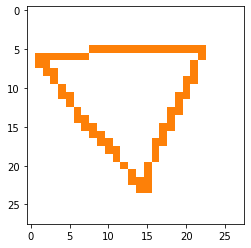

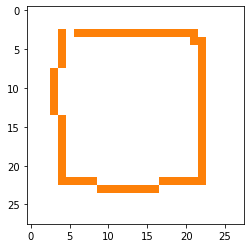

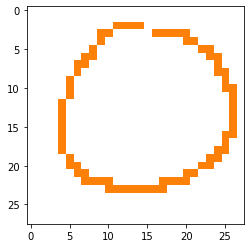

In [80]:
import matplotlib.image as mpimg

test_col = ['test1.png','test2.png','test3.png']
for i in test_col:
 img = mpimg.imread(i)
 plt.figure()
 imgplot = plt.imshow(img)